#HYPOTHESIS TESTING

Berkaitan dengan aktivitas penjualan rumah, terdapat pernyataan bahwa **'Setiap tahunnya harga rumah pasti naik'**.

Menyikapi pernyataan tersebut, perlu dibuktikan apakah pernyataan tersebut benar atau tidak. Maka perlu mengobservasi data penjualan rumah dalam periode waktu tertentu. Data yang disajikan adalah berupa data tentang penjualan rumah selama 5 tahun, yaitu dari tahun 2006 hingga 2010. Data tersebut berisi 1460 daftar penjualan rumah yang terjadi selama 5 tahun tersebut dan berisikan pula informasi tentang karakteristik rumah, tahun terjual, kondisi rumah saat dijual serta harga jual rumah tersebut.

Untuk menanggapi pernyataan di awal, beberapa langkah yang dapat dilakukan adalah:

1. Menentukan hipotesis
2. Mengumpulkan data yang diperlukan
3. Memvisualisasikan data
4. Menguji hipotesis
5. Menarik kesimpulan

#1. Menetukan Hipotesis

Dalam kasus ini, perlu menentukan hipotesis awal *H*<sub>0</sub> dan hipotesis alternatif *H*<sub>1</sub>, yaitu alternatif yang diambil apabila *H*<sub>0</sub> ditolak. Berikut hipotesis yang dapat diberikan untuk kemudian diuji:

* *H*<sub>0</sub>: *rho* ≠ 0 (Harga rumah memiliki keterkaitan dengan tahun jual rumah)
* *H*<sub>1</sub>: *rho* = 0 (Harga rumah tidak memiliki keterkaitan dengan tahun jual rumah)

Dimana *rho* merupakan nilai korelasi antara dua variabel yang akan diuji, yaitu harga jual rumah dengan tahun jual rumah.

Selain hipotesis, di tahap awal juga perlu menentukan level signifikansi (**α**). Dalam kasus ini, ditetapkan nilai **α = 0.05**. Hal ini berarti tingkat kepercayaan adalah sebesar (1 - α) = **95%**.

#2. Mengumpulkan data yang diperlukan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr

In [ ]:
#download the dataset here (data train only):
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

df = pd.read_csv('/content/drive/MyDrive/DIGITAL_SKOLA/train - house prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Kerucutkan data yang ada sebelumnya menjadi hanya kumpulan data yang diperlukan untuk uji hipotesis. Dalam case ini, gunakan data dari kolom 'YrSold' sebagai variabel yang berisi tahun jual rumah dan data dari kolom 'SalePrice' sebagai variabel yang berisikan harga jual rumah. Variabel lain dikesampingkan karena tidak menjadi fokus utama dari uji hipotesis.

In [ ]:
df = df.loc[:, ['YrSold', 'SalePrice']]
df

,YrSold,SalePrice
0,2008,208500
1,2007,181500
2,2008,223500
3,2006,140000
4,2008,250000
...,...,...
1455,2007,175000
1456,2010,210000
1457,2010,266500
1458,2010,142125


Karena uji hipotesis yang akan dilakukan adalah berupa uji korelasi, maka melakukan sampling tidak diwajibkan

#3. Memvisualisasikan data

In [ ]:
sampel = df.groupby('YrSold').count().reset_index()
sampel

,YrSold,SalePrice
0,2006,314
1,2007,329
2,2008,304
3,2009,338
4,2010,175


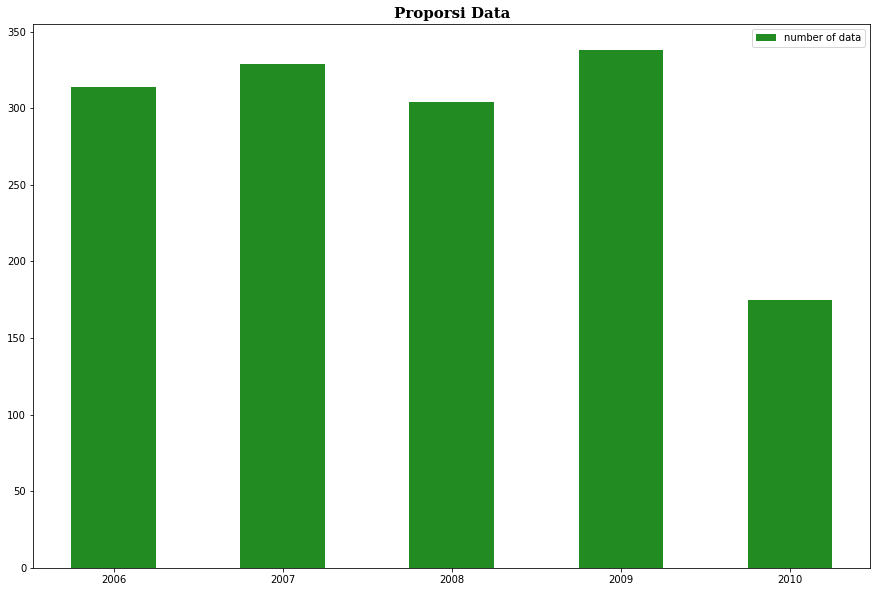

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(sampel['YrSold'], sampel['SalePrice'], width = 0.5, label='number of data', color='forestgreen')
plt.legend()
plt.title('Proporsi Data', fontfamily = 'serif', fontsize=15, fontweight='bold')
plt.show()

#4. Menguji hipotesis

Dalam pengujian hipotesis ini, seperti yang sudah dikemukakan di awal, bahwa metode yang digunakan adalah berupa uji korelasi. Metode ini diujikan ke dua variabel yaitu 'Tahun Jual Rumah' dan 'Harga Jual Rumah'. Diharapkan dengan uji korelasi Pearson dapat menunjukkan nilai korelasi antara dua variabel tersebut.

a. menggunakan library NumPy

In [ ]:
corr = np.corrcoef(df['YrSold'], df['SalePrice'])
print(corr)

[[ 1.         -0.02892259]
 [-0.02892259  1.        ]]


b. Menggunakan library Scipy

In [ ]:
corr, p = stats.pearsonr(df['YrSold'], df['SalePrice'])

print(f'Pearson’s correlation coefficient: %.3f' %corr)
print(f'P-value: %.3f' %p)

Pearson’s correlation coefficient: -0.029
P-value: 0.269


#5. Menarik kesimpulan

Dari uji hipotesis yang dilakukan, didapatkan koefisien korelasi ***rho = -0.029*** dan ***P-value = 0.269***. Nilai-nilai tersebut merepresentasikan hubungan antara dua variabel yang diujikan yaitu **'Tahun Jual Rumah' dan 'Harga Jual Rumah' memiliki tingkat korelasi yang rendah**. Sehingga dari hasil uji hipotesis, maka Hipotesis *H*<sub>0</sub> yaitu harga rumah memiliki keterkaitan dengan tahun jual rumah **tidak sepenuhnya benar**.

Hal ini kemudian dapat digunakan sebagai acuan untuk menjawab pernyataan **'Setiap tahunnya harga rumah pasti naik'**, yaitu pernyataan tersebut **salah**. Hal ini dikarenakan korelasi antara 'Tahun Jual Rumah' dan 'Harga Jual Rumah' memiliki tingkat korelasi yang rendah, yang berarti **ketika tahun jual rumah terus bertambah maka harga jual rumah tidak selalu mengikuti pola kenaikan tahun jual rumah**.

Dengan p-value dari hasil uji hipotesis, dapat digunakan untuk melihat hubungan yang signifikan antar variabel. Nilai p-value yang didapat yaitu 0.269 yang berarti nilai P-Value lebih besar dibandingkan level signifikansi yang sudah ditetapkan yaitu 0.05 sehingga dapat disimpulkan bahwa **tidak terdapat hubungan yang signifikan antara variabel yang diujikan**.